REKHA MARYAM F
15119417
3KA17

In [1]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('GOOG.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-17,2309.320068,2323.340088,2295.000000,2321.409912,2321.409912,992100
1,2021-05-18,2336.906006,2343.149902,2303.159912,2303.429932,2303.429932,865100
2,2021-05-19,2264.399902,2316.760010,2263.520020,2308.709961,2308.709961,967500
3,2021-05-20,2328.040039,2360.340088,2321.090088,2356.090088,2356.090088,1191600
4,2021-05-21,2365.989990,2369.000000,2342.370117,2345.100098,2345.100098,1141600
5,2021-05-24,2367.000000,2418.479980,2360.110107,2406.669922,2406.669922,1062200
6,2021-05-25,2420.000000,2432.889893,2402.989990,2409.070068,2409.070068,941900
7,2021-05-26,2412.834961,2442.944092,2412.514893,2433.530029,2433.530029,1092800
8,2021-05-27,2436.939941,2440.000000,2402.000000,2402.510010,2402.510010,1948100
9,2021-05-28,2421.959961,2428.139893,2407.689941,2411.560059,2411.560059,1205400


In [3]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
19,2021-06-14,2513.389893,2528.22998,2500.939941,2527.040039,2527.040039,1127500


In [4]:
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-17,2309.320068,2323.340088,2295.000000,2321.409912,2321.409912,992100
1,2021-05-18,2336.906006,2343.149902,2303.159912,2303.429932,2303.429932,865100
2,2021-05-19,2264.399902,2316.760010,2263.520020,2308.709961,2308.709961,967500
3,2021-05-20,2328.040039,2360.340088,2321.090088,2356.090088,2356.090088,1191600
4,2021-05-21,2365.989990,2369.000000,2342.370117,2345.100098,2345.100098,1141600
5,2021-05-24,2367.000000,2418.479980,2360.110107,2406.669922,2406.669922,1062200
6,2021-05-25,2420.000000,2432.889893,2402.989990,2409.070068,2409.070068,941900
7,2021-05-26,2412.834961,2442.944092,2412.514893,2433.530029,2433.530029,1092800
8,2021-05-27,2436.939941,2440.000000,2402.000000,2402.510010,2402.510010,1948100
9,2021-05-28,2421.959961,2428.139893,2407.689941,2411.560059,2411.560059,1205400


In [5]:
days = list()
adj_close_prices = list()

In [6]:
days = list()
adj_close_prices = list()

In [8]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [9]:
for day in df_days:
   days.append( [int(day.split('-')[2])] )
for adj_close_price in df_adj_close:
   adj_close_prices.append( float(adj_close_price) )

In [10]:
print(days)

[[17], [18], [19], [20], [21], [24], [25], [26], [27], [28], [1], [2], [3], [4], [7], [8], [9], [10], [11]]


In [11]:
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=2500, gamma=0.35)
rbf_svr.fit(days, adj_close_prices)

SVR(C=2500, gamma=0.35)

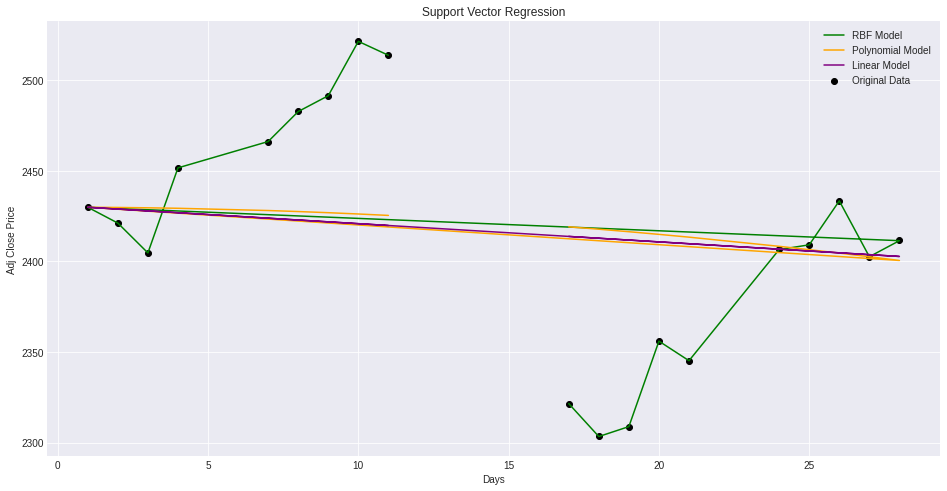

In [12]:
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [13]:
day = [[30]]
print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [2433.54510166]
The Linear SVR predicted: [2400.73336452]
The Polynomial SVR predicted: [2396.19340121]
